In [2]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
x_train = np.random.uniform(-1,1,10000).reshape(-1,1)
y_train = np.random.uniform(-1,1,10000).reshape(-1,1)
z_train = np.exp(x_train**2-y_train**2) - 6*np.exp(x_train**2*y_train)

train = np.hstack((x_train,y_train))
print(train.shape)

(10000, 2)


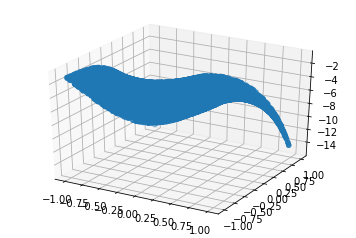

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train,y_train,z_train)


In [14]:
learning_rate = 0.01
training_epochs = 10000
batch_size = 100
display_step = 1000

x = tf.placeholder(tf.float32,[None, 2])
y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random.normal([2,10]),tf.float32)
b1 = tf.Variable(tf.zeros([10]),tf.float32)
W2 = tf.Variable(tf.random.normal([10,20]),tf.float32)
b2 = tf.Variable(tf.zeros([20]),tf.float32)
W3 = tf.Variable(tf.random.normal([20,1]),tf.float32)
b3 = tf.Variable(tf.zeros([1]),tf.float32)

In [17]:
Z1 = tf.add(tf.matmul(x,W1),b1)
A1 = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(A1,W2),b2)
A2 = tf.nn.relu(Z2)

Z3 = tf.add(tf.matmul(A2,W3),b3)
cost = tf.reduce_sum(tf.pow(y-Z3,2))/x_train.shape[0]

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

Epoch: 1000 cost= 0.175386250
Epoch: 2000 cost= 0.029854132
Epoch: 3000 cost= 0.014296334
Epoch: 4000 cost= 0.010190361
Epoch: 5000 cost= 0.007655414
Epoch: 6000 cost= 0.005857911
Epoch: 7000 cost= 0.004661905
Epoch: 8000 cost= 0.004088727
Epoch: 9000 cost= 0.005335086
Epoch: 10000 cost= 0.007185640
Optimization Finished!


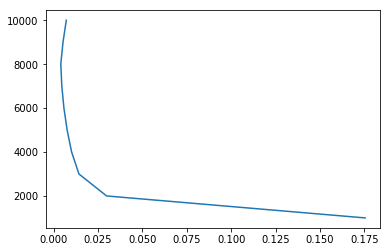

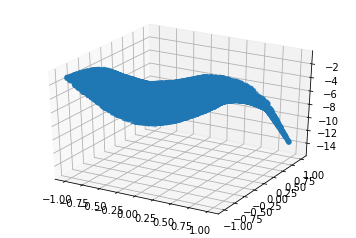

In [18]:
with tf.Session() as sess :
    sess.run(init)
    cost_L=[]
    epoch_L=[]
    for epoch in range(training_epochs):
        avg_cost=0
        _,c=sess.run([optimizer,cost],feed_dict={x:train,y:z_train})
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
            epoch_L.append(epoch+1)
            cost_L.append(c)
    ##y = sess.run(Z3,feed_dict={x:x_test})
    print("Optimization Finished!")
    plt.plot(cost_L,epoch_L)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_train,y_train,sess.run(Z3,feed_dict={x:train,y:z_train}))